# <center>**Modélisation statistique avancée - Contrôle**</center>
### <center>17 Décembre 2025</center>

## **Partie I. Questions de cours** 

Soit $K(x):=a(1-x^2)^3\mathbb{I}_{[-1,1]}(x)$, où $\mathbb{I}_{[-1,1]}(x)$ désigne la fonction indicatrice, *i.e.* $\mathbb{I}_{[-1,1]}(x)=1$ si $x\in[-1,1]$, 0 sinon, et $a\in\mathbb{R}$. Nous souhaitons proposer $K$ comme fonction noyau.

**Q3.** $K$ est bien une fonction symétrique ?

$K(-x)=a(1-(-x)^2)^3\mathbb I_{[-1,1]}(-x) = K(x)$ car $(-x)^2=x^2$ et $\mathbb I_{[-1,1]}(x)$ est symétrique vu que l'intervalle $[-1,1]$ l'est.

**Q4.** Quelles sont les deux propriétés mathématiques essentielles que ce noyau doit vérifier ? Déterminer $a$ tel que $K$ soit un choix pertinent.

* $K(x)\geq0$ for all $x$
* $\int_{\mathbb R}K(x)dx=1$

On cherche $a$ t.q. $\int_{\mathbb R}K(x)dx=1$ :

\begin{eqnarray}
\int_{\mathbb R}K(x)dx &=& \int_{\mathbb R}a(1-x^2)^3\mathbb{I}_{[-1,1]}(x)dx \\
&=& a\int_{-1}^1(1-x^2)^3dx \\
&=& a\int_{-1}^1(1-3x^2+3x^4-x^6)dx \\
&=& a\left[x-x^3+\frac{3}{5}x^5-\frac{1}{7}x^7\right]_{-1}^1 \\
&=& 2a\left(1-1+\frac{3}{5}-\frac{1}{7}\right)\\
&=& a\frac{32}{35}
\end{eqnarray}

D'où :

\begin{equation}
\int_{\mathbb R}K(x)dx = 1 \Leftrightarrow a\frac{32}{35}=1 \Leftrightarrow a=\frac{35}{32}
\end{equation}

**Bonus.** L'expression asymptotyque du biais d'un estimateur à noyau $K$ et avec paramètre de lissage $\nu$ au point $x$ est donnée par : 
\begin{equation}
\mathrm{Biais}(K,\nu,x)\approx\frac{\nu^2}{2}f''(x)\mu_2(K),
\end{equation}
où $\mu_2(K):=\int x^2K(x)dx$ est le moment d'ordre 2.

Calculer $\mu_2(K)$ pour le noyau donné. Qu'est-ce que vous pouvez conclure sur le biais d'un estimateur à noyau lorsque $\nu$ augmente ?

\begin{eqnarray}
\mu_2(K) &=& \int_{-1}^1\frac{35}{32}x^2(1-x^2)^3dx\\
&=& \frac{35}{32}\int_{-1}^1(x^2-3x^4+3x^6-x^8)dx\\
&=& \frac{35}{32}\left[\frac{1}{3}x^3-\frac{3}{5}x^5+\frac{3}{7}x^7-\frac{1}{9}x^9\right]_{-1}^1\\
&=& 2\cdot\frac{35}{32}\left(\frac{1}{3}-\frac{3}{5}+\frac{3}{7}-\frac{1}{9}\right)\\
&=& 2\cdot\frac{35}{32}\frac{16}{315} = \frac{1}{9}
\end{eqnarray}

Lorsque $\nu$ augmente, le biais de l'estimateur à noyau augmente.

## **Partie II. Application** 

Soit $U$ une variable aléatoire à valeurs dans $\{1,2,3\}$ telle que:
\begin{equation}
\begin{cases}
P(U=1)=p_1 \\
P(U=2)=p_2 \\
P(U=3)=p_3
\end{cases}
\end{equation}
avec $p_i>0, i=1,\dots,3$ et $p_1+p_2+p_3=1$.
Soit $X$ une variable dépendante de $U$ et distribuée de la manière suivante :
\begin{equation}
X|U\sim\begin{cases}
\mathcal{N}(\mu_1=10,\sigma_1=1)\textrm{ si $U=1$} \\
\mathcal{N}(\mu_2=9,\sigma_2=2)\textrm{ si $U=2$} \\
\mathcal{N}(\mu_3=12,\sigma_3=3)\textrm{ si $U=3$}
\end{cases}
\end{equation}
On peut donc montrer que la variable $X$ a pour densité :
\begin{equation}
f_X(x)=p_1\psi(\mu_1,\sigma_1)+p_2\psi(\mu_2,\sigma_2)+p_3\psi(\mu_3,\sigma_3),
\end{equation}
où $\psi(\mu,\sigma)$ est la fonction de densité d'une variable gaussienne de moyenne $\mu$ et déviation standard $\sigma$,
\begin{equation}
\psi(\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
\end{equation}

**1.** Choisir 3 valeurs opportuns pour les quantités $p_1, p_2$ et $p_3$ et générer un échantillon de taille $N=500$, $\mathcal{D}_{500}$, suivant la loi de $X$.

In [1]:
import numpy as np # linear algebra
from scipy.stats import norm

In [2]:
p1, p2, p3 = .2, .3, .5

mu1, mu2, mu3 = 10, 9, 12

sigma1, sigma2, sigma3 = 1, 2, 3

N=500

s1, s2, s3 = int(p1*N), int(p2*N), N-(int(p1*N)+int(p2*N))

X1, X2, X3 = norm.rvs(loc=mu1, scale=sigma1,size=s1), norm.rvs(loc=mu2, scale=sigma2,size=s2), norm.rvs(loc=mu3, scale=sigma3,size=s3)

D500 = np.concatenate((X1,X2,X3))
np.random.shuffle(D500)

# Min and Max of the sample
min_x = min(D500)
max_x = max(D500)

print(f'Les observations dans l\'échantillon généré de taille {len(D500)} sont comprises dans l\'intervalle [{round(min_x,2)},{round(max_x,2)}].')

Les observations dans l'échantillon généré de taille 500 sont comprises dans l'intervalle [2.77,18.99].


**2.** Representer sur une figure l'estimation de la densité de $\mathcal D_{500}$ par histogrammes, $\hat f_b^{\textrm{Hist}}$, avec un nombre de bins $b=5,10,20,50$. Quelle choix de $b$ vous semble le plus adaptée à votre échantillon ?

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

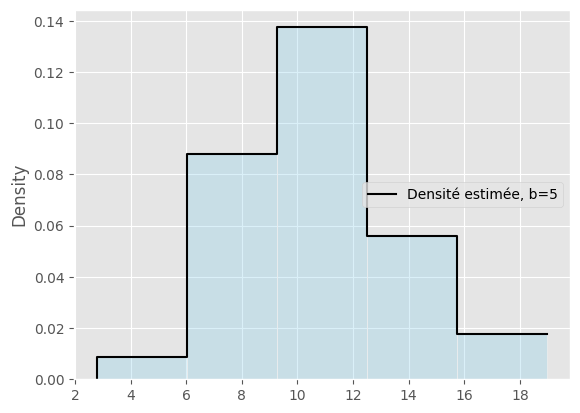

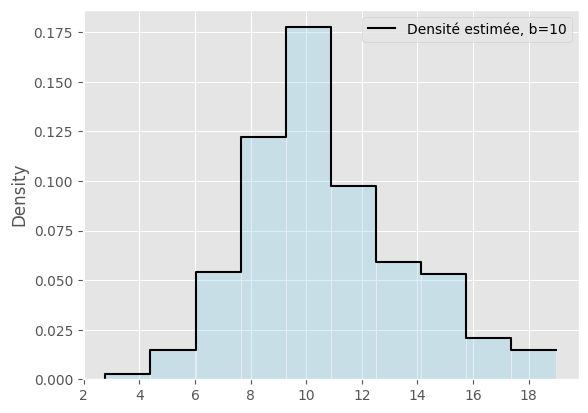

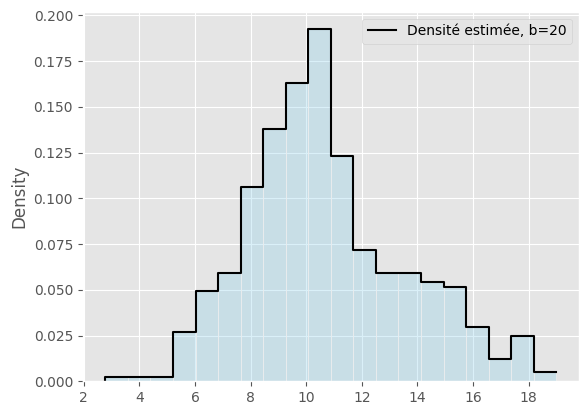

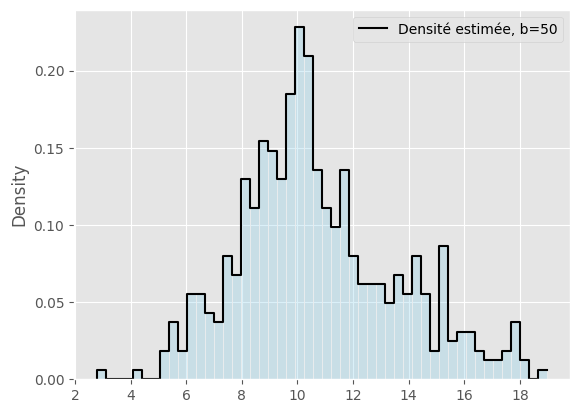

In [4]:
for b in [5,10,20,50]:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    bins = np.linspace(min_x, max_x, b+1)
    nu = (max_x-min_x)/b
    
    ax = sns.histplot(D500,
                     bins=bins, # Here we impose the intervals as they have been defined in the previous cell
                     stat='density', # Normalize such that the total area of the histogram equals 1
                     color="skyblue",
                     alpha=.3
                    )
    
    counts, _ = np.histogram(D500, bins=bins)
    f_hat = [0]+[count_i/(N*nu) for count_i in counts]
    sns.lineplot(x=bins,y=f_hat, drawstyle='steps-pre', color='k', label='Densité estimée, b=%i' %b)
    plt.show()

**3.** Soit $K(x):=\frac{15}{16}(1-x^2)^2\mathbb{I}_{[-1,1]}(x)$. Définir une fonction qui permette de calculer pour tout $x\in\mathbb R$ la fonction suivante :
\begin{equation}
\hat f_{\nu}^K(x):=\frac{1}{N\nu}\sum_{i=1}^N K\left(\frac{x-x_i}{\nu}\right),
\end{equation}
pour un $N$-échantillon $\mathcal D_N=\{x_1,\dots,x_N\}$ et un $\nu\in\mathbb R$ donnés. Qu'est-ce que $f_{\nu}^K(x)$ répresente ?

In [5]:
def K(x):
    ind = 1 if abs(x)<=1 else 0
    return 35*((1-x**2)**3)*ind/32

def f_hat_K_x(x,data,nu):
    N = len(data)
    return sum([K((x-xj)/nu)  for xj in data])/(N*nu)

**4.** Choisir une des méthodes vues en cours pour déterminer le $\nu$ optimal d'un estimateur à noyau, et l'utiliser pour déterminer le meilleur choix de $\nu$ pour $\hat f_{\nu}^K$ et pour l'échantillon $\mathcal D_{500}$ généré au point **1**.

In [6]:
def bw_silverman(X):
    # X : data (np.array)
    
    def _select_sigma(X):
        # X : data (np.array)
        
        q75, q25 = np.percentile(X, [75 ,25])
        iqr = q75 - q25
        std = np.std(X)

        A = min(std,iqr/1.34)
        return A
        
    sigma = _select_sigma(X)
    N = len(X)
    nu_opt = sigma * (3*N/4)**(-1/5)
    return nu_opt

In [7]:
nu_sil=bw_silverman(D500)
print(f'La fenetre optimale par la règle de Silverman est {round(nu_sil,2)}')

La fenetre optimale par la règle de Silverman est 0.81


**5.** Sur une même figure, répresenter $\hat f_b^{\mathrm{Hist}}$ et $\hat f_{\nu}^K$. Utiliser la valeur de $b$ reteue au point **2** at la valuer de $\nu$ retenue au point **4** pour $\hat f_b^{\mathrm{Hist}}$ et $\hat f_{\nu}^K$ respectivement. Commentez.

In [8]:
b, nu = 20, nu_sil

[Text(0.5, 0, 'x'), Text(0, 0.5, 'Density')]

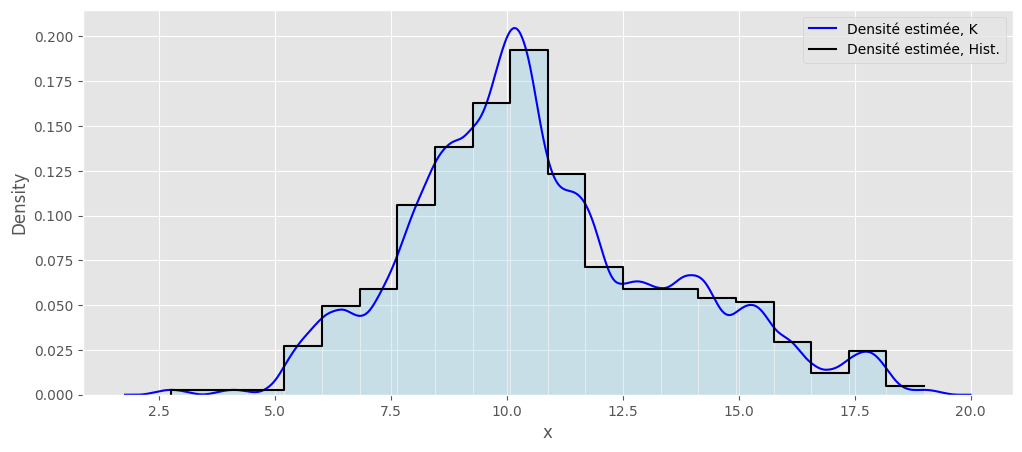

In [9]:
x_lin = np.linspace(min_x-1,max_x+1, 1000)
f_hat_K = np.array([f_hat_K_x(x,D500,nu) for x in x_lin])

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

bins = np.linspace(min_x, max_x, b+1)
nu_H = (max_x-min_x)/b
ax= sns.histplot(data=D500,
                 bins=bins, 
                 stat='density', # Normalize such that the total area of the histogram equals 1
                 color="skyblue",
                 alpha=.3)

ax.plot(x_lin,f_hat_K,'b-', label='Densité estimée, K')

counts, _ = np.histogram(D500, bins=bins)
f_hat = [0]+[count_i/(N*nu_H) for count_i in counts]
sns.lineplot(x=bins,y=f_hat, drawstyle='steps-pre', color='k', label='Densité estimée, Hist.')

ax.set(xlabel='x', ylabel='Density')

**Bonus.** Reproduire la même figure qu'au point **5** et rajouter aussi $f_X$. Quel estimateur vous semble-t-il mieux adapté ?

[Text(0.5, 0, 'x'), Text(0, 0.5, 'Density')]

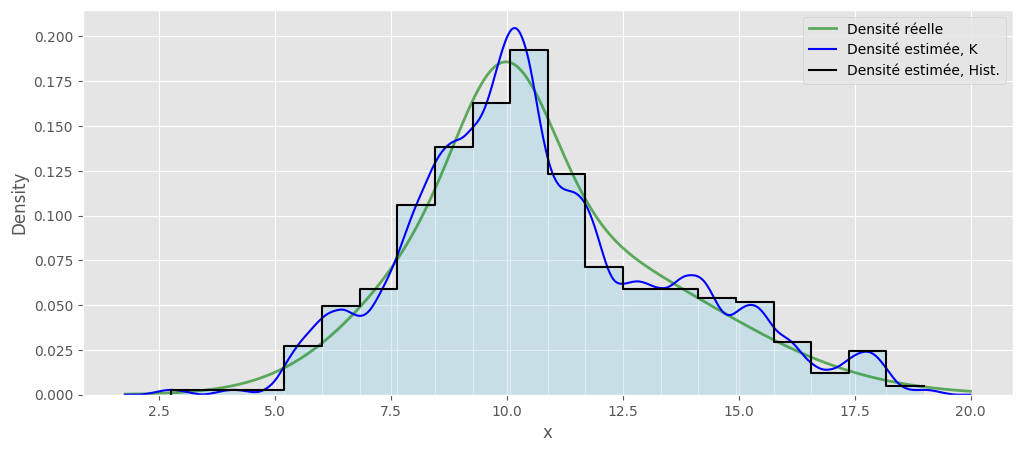

In [10]:
x_lin = np.linspace(min_x-1,max_x+1, 1000)

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax= sns.histplot(data=D500,
                 bins=bins, 
                 stat='density', # Normalize such that the total area of the histogram equals 1
                 color="skyblue",
                 alpha=.3)

ax.plot(x_lin, p1*norm.pdf(x_lin,loc=mu1, scale=sigma1)+p2*norm.pdf(x_lin,loc=mu2, scale=sigma2)+p3*norm.pdf(x_lin,loc=mu3, scale=sigma3),'g-', lw=2, alpha=0.6, label='Densité réelle')

ax.plot(x_lin,f_hat_K,'b-', label='Densité estimée, K')

sns.lineplot(x=bins,y=f_hat, drawstyle='steps-pre', color='k', label='Densité estimée, Hist.')

ax.set(xlabel='x', ylabel='Density')